In [4]:
import pandas as pd

URL = "https://raw.githubusercontent.com/feststelltaste/software-data/master/projects/buschmais-spring-petclinic-joa/git_log_unixtimestamp-author.log"
df = pd.read_csv(URL, sep="\t", names=["time","author"])
df[['timestamp', 'timezone']] = df.time.str.split(" ", expand=True)
df.head()

,time,author,timestamp,timezone
0,1518180584 +0100,JavaOnAutobahn,1518180584,+0100
1,1518180229 +0100,JavaOnAutobahn,1518180229,+0100
2,1518179666 +0100,JavaOnAutobahn,1518179666,+0100
3,1518104859 +0100,Markus Harrer,1518104859,+0100
4,1518104723 +0100,Markus Harrer,1518104723,+0100


In [47]:
import pandas as pd

raw = pd.read_csv(
    URL,
    sep="\t",
    encoding="latin-1",
    header=None,
    names=['unix_timestamp', 'author'])

# create separate columns for time data
raw[['timestamp', 'timezone']] = raw['unix_timestamp'].str.split(" ", expand=True)
# convert timestamp data
raw['timestamp'] = pd.to_datetime(raw['timestamp'], unit="s")
# add hourly offset data
raw['timezone_offset'] = pd.to_numeric(raw['timezone']) / 100.0
# calculate the local time
raw["timestamp_local"] = raw['timestamp'] + pd.to_timedelta(raw['timezone_offset'], unit='h')

# filter out wrong timestamps
raw = raw[
    (raw['timestamp'] >= raw.iloc[-1]['timestamp']) &
    (raw['timestamp'] <= pd.to_datetime('today'))]

git_authors = raw[['timestamp_local', 'timezone', 'author']].copy()
git_authors.head()

,timestamp_local,timezone,author
3,2018-02-08 16:47:39,+0100,Markus Harrer
4,2018-02-08 16:45:23,+0100,Markus Harrer
5,2018-02-08 16:44:16,+0100,Markus Harrer
6,2018-02-08 15:04:42,+0100,Markus Harrer
7,2017-11-22 17:54:34,+0100,Markus Harrer


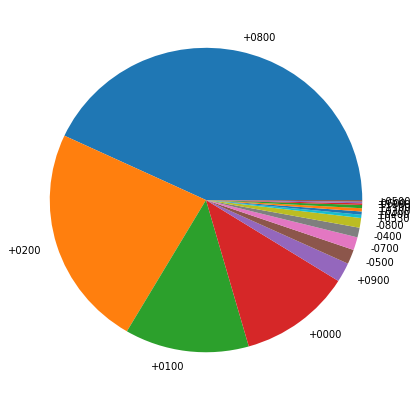

In [48]:
%matplotlib inline
df.timezone.value_counts().plot.pie(figsize=(7,7), label="")

In [49]:
pie_df.timezone.value_counts().head(5).index

Index(['+0800', '+0200', '+0100', '+0000', '+0900'], dtype='object')

In [45]:
top5 = pie_df.timezone.value_counts().nlargest()
top5

TypeError: Cannot use method 'nlargest' with dtype object

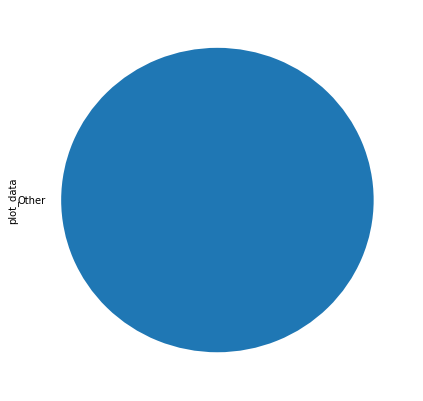

In [42]:
df.loc[~df.timezone.isin(top5), 'plot_data'] = "Other"
df.plot_data.value_counts().plot.pie(figsize=[7,7])